In [79]:
import numpy as np
import json
import os
import pickle
import matplotlib.pyplot as plt
import faceted 
import scipy.stats as stats
from matplotlib.legend_handler import HandlerBase
import utils
import seaborn as sns
print("Computing Figure 1...... ")

Computing Figure 1...... 


In [80]:
utils.set_plot_configs(plt, fsize=8)

In [81]:
results_dir = utils.get_path('results')

data = results_dir + '/ZECMIP_data.json'

print("Loading in ZECMIP data from data.json... ")
with open(data) as file:
    ZECMIP = json.load(file)
    
# convert data from lists to arrays
for model in ZECMIP.keys():
    for exp in ["750", "1000", "2000"]:
        if exp in ZECMIP[model].keys():
            for var in ZECMIP[model][exp].keys():
                ZECMIP[model][exp][var] = np.array(ZECMIP[model][exp][var])

Loading in ZECMIP data from data.json... 


In [82]:
# Plotting on ax1 (first subplot)
data = {}
for name in ZECMIP:
    data[name] = {}
    d = ZECMIP[name]["1000"]
    data[name]['ZEC'] = d['delta_t_avg'][d['index'] >= int(d['stop_index'])] - d['delta_t_avg'][int(d['stop_index'])]

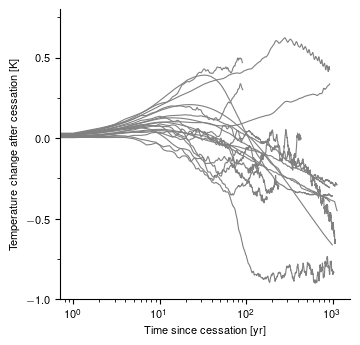

In [101]:
fig, (axis,) = faceted.faceted(1,1,sharex=True,width=3.5, aspect=1.0, sharey=False, left_pad=.55,
                              bottom_pad=.4, right_pad=.05, top_pad=.05)
                    
# Plotting on ax1 (first subplot)
for name in ZECMIP:
    d = data[name]
    axis.plot(
            np.arange(len(d['ZEC'])),
            d['ZEC'],
            color="grey",
            alpha=1,
            label=name,
            linestyle="solid",
            linewidth = .8,
    )

sns.despine()

axis.semilogx()
axis.set_yticks([-1, -.5, 0, .5, 1])
axis.set_yticks([-.75, -.25, .25, .75], minor=True)
axis.set_xlabel(r"Time since cessation [yr]")
axis.set_ylabel(r"Temperature change after cessation [K]")
axis.set_ylim([-1, .8])
    
outpath = results_dir+"/figures/fig_1.pdf"
fig.savefig(outpath)